# import libraries

In [1]:
import pandas as pd
import json
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

### Match Summary

In [2]:
with open(r'C:\Users\hunda\OneDrive\Desktop\Data\STUDY\Data Analyst\Krish Naik\Python\Projects\Cricket_T20_Analysis\data\json\t20_wc_match_results.json', 'r') as file:
    match_summary = json.load(file)
match_summary

[{'matchSummary': [{'team1': 'Namibia',
    'team2': 'Sri Lanka',
    'winner': 'Namibia',
    'margin': '55 runs',
    'ground': 'Geelong',
    'matchDate': 'Oct 16, 2022',
    'scorecard': 'T20I # 1823'},
   {'team1': 'Netherlands',
    'team2': 'U.A.E.',
    'winner': 'Netherlands',
    'margin': '3 wickets',
    'ground': 'Geelong',
    'matchDate': 'Oct 16, 2022',
    'scorecard': 'T20I # 1825'},
   {'team1': 'Scotland',
    'team2': 'West Indies',
    'winner': 'Scotland',
    'margin': '42 runs',
    'ground': 'Hobart',
    'matchDate': 'Oct 17, 2022',
    'scorecard': 'T20I # 1826'},
   {'team1': 'Ireland',
    'team2': 'Zimbabwe',
    'winner': 'Zimbabwe',
    'margin': '31 runs',
    'ground': 'Hobart',
    'matchDate': 'Oct 17, 2022',
    'scorecard': 'T20I # 1828'},
   {'team1': 'Namibia',
    'team2': 'Netherlands',
    'winner': 'Netherlands',
    'margin': '5 wickets',
    'ground': 'Geelong',
    'matchDate': 'Oct 18, 2022',
    'scorecard': 'T20I # 1830'},
   {'team1':

In [3]:
print(f'No. of match summary tables = {len(match_summary)}')

No. of match summary tables = 1


In [4]:
match_summary[0]['matchSummary']

[{'team1': 'Namibia',
  'team2': 'Sri Lanka',
  'winner': 'Namibia',
  'margin': '55 runs',
  'ground': 'Geelong',
  'matchDate': 'Oct 16, 2022',
  'scorecard': 'T20I # 1823'},
 {'team1': 'Netherlands',
  'team2': 'U.A.E.',
  'winner': 'Netherlands',
  'margin': '3 wickets',
  'ground': 'Geelong',
  'matchDate': 'Oct 16, 2022',
  'scorecard': 'T20I # 1825'},
 {'team1': 'Scotland',
  'team2': 'West Indies',
  'winner': 'Scotland',
  'margin': '42 runs',
  'ground': 'Hobart',
  'matchDate': 'Oct 17, 2022',
  'scorecard': 'T20I # 1826'},
 {'team1': 'Ireland',
  'team2': 'Zimbabwe',
  'winner': 'Zimbabwe',
  'margin': '31 runs',
  'ground': 'Hobart',
  'matchDate': 'Oct 17, 2022',
  'scorecard': 'T20I # 1828'},
 {'team1': 'Namibia',
  'team2': 'Netherlands',
  'winner': 'Netherlands',
  'margin': '5 wickets',
  'ground': 'Geelong',
  'matchDate': 'Oct 18, 2022',
  'scorecard': 'T20I # 1830'},
 {'team1': 'Sri Lanka',
  'team2': 'U.A.E.',
  'winner': 'Sri Lanka',
  'margin': '79 runs',
  'gr

In [5]:
print(f'No. of matches played = {len(match_summary[0]['matchSummary'])}')

No. of matches played = 45


### Create df

In [6]:
match_summary_df = pd.DataFrame(match_summary[0]['matchSummary'])
match_summary_df.head(5)

,team1,team2,winner,margin,ground,matchDate,scorecard
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


In [7]:
match_summary_df.rename(columns={'scorecard':'match_id'}, inplace=True)
match_summary_df.head(1)

,team1,team2,winner,margin,ground,matchDate,match_id
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823


### Create a match ids dictionary that maps team names to a unique match id. This will be useful later on to link with other tables

In [8]:
match_ids_dict = {}

for index, row in match_summary_df.iterrows():

    key1 = row['team1'] + ' Vs ' + row['team2']
    key2 = row['team2'] + ' Vs ' + row['team1']

    match_ids_dict[key1] = row['match_id']
    match_ids_dict[key2] = row['match_id']

match_ids_dict

{'Namibia Vs Sri Lanka': 'T20I # 1823',
 'Sri Lanka Vs Namibia': 'T20I # 1823',
 'Netherlands Vs U.A.E.': 'T20I # 1825',
 'U.A.E. Vs Netherlands': 'T20I # 1825',
 'Scotland Vs West Indies': 'T20I # 1826',
 'West Indies Vs Scotland': 'T20I # 1826',
 'Ireland Vs Zimbabwe': 'T20I # 1828',
 'Zimbabwe Vs Ireland': 'T20I # 1828',
 'Namibia Vs Netherlands': 'T20I # 1830',
 'Netherlands Vs Namibia': 'T20I # 1830',
 'Sri Lanka Vs U.A.E.': 'T20I # 1832',
 'U.A.E. Vs Sri Lanka': 'T20I # 1832',
 'Ireland Vs Scotland': 'T20I # 1833',
 'Scotland Vs Ireland': 'T20I # 1833',
 'West Indies Vs Zimbabwe': 'T20I # 1834',
 'Zimbabwe Vs West Indies': 'T20I # 1834',
 'Netherlands Vs Sri Lanka': 'T20I # 1835',
 'Sri Lanka Vs Netherlands': 'T20I # 1835',
 'Namibia Vs U.A.E.': 'T20I # 1836',
 'U.A.E. Vs Namibia': 'T20I # 1836',
 'Ireland Vs West Indies': 'T20I # 1837',
 'West Indies Vs Ireland': 'T20I # 1837',
 'Scotland Vs Zimbabwe': 'T20I # 1838',
 'Zimbabwe Vs Scotland': 'T20I # 1838',
 'Australia Vs New Zea

In [9]:
print(f'Total Match Ids = {len(match_ids_dict)}')

Total Match Ids = 90


### download csv

In [10]:
match_summary_df.to_csv(r'C:\Users\hunda\OneDrive\Desktop\Data\STUDY\Data Analyst\Krish Naik\Python\Projects\Cricket_T20_Analysis\data\csv\match_summary.csv', index=False)

### Batting Summary

In [11]:
with open(r'C:\Users\hunda\OneDrive\Desktop\Data\STUDY\Data Analyst\Krish Naik\Python\Projects\Cricket_T20_Analysis\data\json\t20_wc_batting_summary.json', 'r') as file:
    batting_summary = json.load(file)
batting_summary

[{'battingSummary': [{'match': 'Namibia Vs Sri Lanka',
    'teamInnings': 'Namibia',
    'battingPos': 1,
    'batsmanName': 'Michael van Lingen',
    'dismissal': 'c Pramod Madushan b Chameera',
    'runs': '3',
    'balls': '6',
    '4s': '0',
    '6s': '0',
    'SR': '50.00'},
   {'match': 'Namibia Vs Sri Lanka',
    'teamInnings': 'Namibia',
    'battingPos': 2,
    'batsmanName': 'Divan la Cock',
    'dismissal': 'c Shanaka b Pramod Madushan',
    'runs': '9',
    'balls': '9',
    '4s': '1',
    '6s': '0',
    'SR': '100.00'},
   {'match': 'Namibia Vs Sri Lanka',
    'teamInnings': 'Namibia',
    'battingPos': 3,
    'batsmanName': 'Jan Nicol Loftie-Eaton',
    'dismissal': 'c †Mendis b Karunaratne',
    'runs': '20',
    'balls': '12',
    '4s': '1',
    '6s': '2',
    'SR': '166.66'},
   {'match': 'Namibia Vs Sri Lanka',
    'teamInnings': 'Namibia',
    'battingPos': 4,
    'batsmanName': 'Stephan Baard',
    'dismissal': 'c DM de Silva b Pramod Madushan',
    'runs': '26',
  

In [12]:
print(f'No. of macthes = {len(batting_summary)}')

No. of macthes = 45


### Flatten data

In [13]:
batting_summary_all_records = []

for rec in batting_summary:
    batting_summary_all_records.extend(rec['battingSummary'])
batting_summary_all_records

[{'match': 'Namibia Vs Sri Lanka',
  'teamInnings': 'Namibia',
  'battingPos': 1,
  'batsmanName': 'Michael van Lingen',
  'dismissal': 'c Pramod Madushan b Chameera',
  'runs': '3',
  'balls': '6',
  '4s': '0',
  '6s': '0',
  'SR': '50.00'},
 {'match': 'Namibia Vs Sri Lanka',
  'teamInnings': 'Namibia',
  'battingPos': 2,
  'batsmanName': 'Divan la Cock',
  'dismissal': 'c Shanaka b Pramod Madushan',
  'runs': '9',
  'balls': '9',
  '4s': '1',
  '6s': '0',
  'SR': '100.00'},
 {'match': 'Namibia Vs Sri Lanka',
  'teamInnings': 'Namibia',
  'battingPos': 3,
  'batsmanName': 'Jan Nicol Loftie-Eaton',
  'dismissal': 'c †Mendis b Karunaratne',
  'runs': '20',
  'balls': '12',
  '4s': '1',
  '6s': '2',
  'SR': '166.66'},
 {'match': 'Namibia Vs Sri Lanka',
  'teamInnings': 'Namibia',
  'battingPos': 4,
  'batsmanName': 'Stephan Baard',
  'dismissal': 'c DM de Silva b Pramod Madushan',
  'runs': '26',
  'balls': '24',
  '4s': '2',
  '6s': '0',
  'SR': '108.33'},
 {'match': 'Namibia Vs Sri Lan

In [14]:
len(batting_summary_all_records)

699

In [15]:
print(f'Total records = {len(batting_summary_all_records)}')

Total records = 699


In [16]:
batting_summary_df = pd.DataFrame(batting_summary_all_records)
batting_summary_df.tail()

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR
694,Pakistan Vs England,England,3,Phil Salt,c Iftikhar Ahmed b Haris Rauf,10,9,2,0,111.11
695,Pakistan Vs England,England,4,Ben Stokes,,52,49,5,1,106.12
696,Pakistan Vs England,England,5,Harry Brook,c Shaheen Shah Afridi b Shadab Khan,20,23,1,0,86.95
697,Pakistan Vs England,England,6,Moeen Ali,b Mohammad Wasim,19,13,3,0,146.15
698,Pakistan Vs England,England,7,Liam Livingstone,,1,1,0,0,100.00


In [17]:
### create functions to deal with special characters like â€†

spl_chars = r'[^\w\s\'()-/&]'

def has_spl_chars(name):
    return bool(re.search(spl_chars, name))

def spl_chars_name(name):
    special_characters = re.findall(spl_chars, name)
    return ''.join(set(special_characters))

def spl_chars_removal(name):
    return re.sub(spl_chars, '', name)

def dismissal(status):
    return 'out' if len(status)>0 else 'not out'

In [18]:
batting_summary_df['batsmanName_has_spl_chars'] = batting_summary_df['batsmanName'].apply(has_spl_chars)
batting_summary_df['batsmanName_spl_chars_name'] = batting_summary_df['batsmanName'].apply(spl_chars_name)
batting_summary_df['cleaned_batsmanName'] = batting_summary_df['batsmanName'].apply(spl_chars_removal)

batting_summary_df['dismissal_has_spl_chars'] = batting_summary_df['dismissal'].apply(has_spl_chars)
batting_summary_df['dismissal_spl_chars_name'] = batting_summary_df['dismissal'].apply(spl_chars_name)
batting_summary_df['cleaned_dismissal'] = batting_summary_df['dismissal'].apply(spl_chars_removal)

batting_summary_df.head(3)

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR,batsmanName_has_spl_chars,batsmanName_spl_chars_name,cleaned_batsmanName,dismissal_has_spl_chars,dismissal_spl_chars_name,cleaned_dismissal
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00,False,,Michael van Lingen,False,,c Pramod Madushan b Chameera
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00,False,,Divan la Cock,False,,c Shanaka b Pramod Madushan
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c †Mendis b Karunaratne,20,12,1,2,166.66,False,,Jan Nicol Loftie-Eaton,True,†,c Mendis b Karunaratne


In [19]:
print(f'Total rows with spl chars in batsmanName column = {len(batting_summary_df[batting_summary_df['batsmanName_has_spl_chars']])}')
print(f'Total rows with spl chars in dismissal column = {len(batting_summary_df[batting_summary_df['dismissal_has_spl_chars']])}')

Total rows with spl chars in batsmanName column = 80
Total rows with spl chars in dismissal column = 92


In [20]:
batting_summary_df.columns

Index(['match', 'teamInnings', 'battingPos', 'batsmanName', 'dismissal',
       'runs', 'balls', '4s', '6s', 'SR', 'batsmanName_has_spl_chars',
       'batsmanName_spl_chars_name', 'cleaned_batsmanName',
       'dismissal_has_spl_chars', 'dismissal_spl_chars_name',
       'cleaned_dismissal'],
      dtype='object')

In [21]:
batting_summary_df.drop(columns={'batsmanName', 'dismissal','batsmanName_has_spl_chars',
       'batsmanName_spl_chars_name', 'dismissal_has_spl_chars', 'dismissal_spl_chars_name'}, inplace=True)

batting_summary_df.rename(columns={'cleaned_batsmanName':'batsmanName','cleaned_dismissal':'out/not_out'}, inplace=True)

batting_summary_df['out/not_out'] = batting_summary_df['out/not_out'].apply(dismissal)
batting_summary_df.head(1)

,match,teamInnings,battingPos,runs,balls,4s,6s,SR,batsmanName,out/not_out
0,Namibia Vs Sri Lanka,Namibia,1,3,6,0,0,50.00,Michael van Lingen,out


### mapping match id to matches

In [22]:
batting_summary_df['match_id'] = batting_summary_df['match'].map(match_ids_dict)
batting_summary_df.head()

,match,teamInnings,battingPos,runs,balls,4s,6s,SR,batsmanName,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,3,6,0,0,50.00,Michael van Lingen,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,9,9,1,0,100.00,Divan la Cock,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,20,12,1,2,166.66,Jan Nicol Loftie-Eaton,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,26,24,2,0,108.33,Stephan Baard,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,20,24,0,0,83.33,Gerhard Erasmus(c),out,T20I # 1823


### download as csv

In [23]:
batting_summary_df.to_csv(r'C:\Users\hunda\OneDrive\Desktop\Data\STUDY\Data Analyst\Krish Naik\Python\Projects\Cricket_T20_Analysis\data\csv\batting_summary.csv', index=False)

# Bowling Summary

In [24]:
with open(r'C:\Users\hunda\OneDrive\Desktop\Data\STUDY\Data Analyst\Krish Naik\Python\Projects\Cricket_T20_Analysis\data\json\t20_wc_bowling_summary.json', 'r') as file:
    bowling_summary = json.load(file)

In [25]:
len(bowling_summary)

45

In [26]:
bowling_summary_all_records = []

for rec in bowling_summary:
    bowling_summary_all_records.extend(rec['bowlingSummary'])
bowling_summary_all_records

[{'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Maheesh Theekshana',
  'overs': '4',
  'maiden': '0',
  'runs': '23',
  'wickets': '1',
  'economy': '5.75',
  '0s': '7',
  '4s': '0',
  '6s': '0',
  'wides': '2',
  'noBalls': '0'},
 {'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Dushmantha Chameera',
  'overs': '4',
  'maiden': '0',
  'runs': '39',
  'wickets': '1',
  'economy': '9.75',
  '0s': '6',
  '4s': '3',
  '6s': '1',
  'wides': '2',
  'noBalls': '0'},
 {'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Pramod Madushan',
  'overs': '4',
  'maiden': '0',
  'runs': '37',
  'wickets': '2',
  'economy': '9.25',
  '0s': '6',
  '4s': '3',
  '6s': '1',
  'wides': '0',
  'noBalls': '0'},
 {'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Chamika Karunaratne',
  'overs': '4',
  'maiden': '0',
  'runs': '36',
  'wickets': '1',
  'economy': '9.00',
  '0s': '7',
  

In [27]:
bowling_summary_df = pd.DataFrame(bowling_summary_all_records)
bowling_summary_df.head(11)

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0
5,Namibia Vs Sri Lanka,Namibia,Gerhard Erasmus,1,0,8,0,8.00,1,1,0,0,0
6,Namibia Vs Sri Lanka,Namibia,David Wiese,4,0,16,2,4.00,13,1,0,0,0
7,Namibia Vs Sri Lanka,Namibia,Bernard Scholtz,4,0,18,2,4.50,10,1,0,0,0
8,Namibia Vs Sri Lanka,Namibia,Ben Shikongo,3,1,22,2,7.33,6,3,0,0,0
9,Namibia Vs Sri Lanka,Namibia,JJ Smit,3,0,16,1,5.33,7,0,0,1,0


In [28]:
bowling_summary_df['match_id'] = bowling_summary_df['match'].map(match_ids_dict)

In [29]:
bowling_summary_df.to_csv(r'C:\Users\hunda\OneDrive\Desktop\Data\STUDY\Data Analyst\Krish Naik\Python\Projects\Cricket_T20_Analysis\data\csv\bowling_summary.csv', index=False)

# WC Players

In [30]:
with open(r'C:\Users\hunda\OneDrive\Desktop\Data\STUDY\Data Analyst\Krish Naik\Python\Projects\Cricket_T20_Analysis\data\json\t20_wc_player_info.json', 'r') as file:
    wc_players = json.load(file)

In [31]:
wc_players_df = pd.DataFrame(wc_players)
wc_players_df.head()

,name,team,battingStyle,bowlingStyle,playingRole,description
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,
2,Jan Nicol Loftie-Eaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,
4,Gerhard Erasmus(c),Namibia,Right hand Bat,Right arm Offbreak,Allrounder,


In [32]:
wc_players_df.to_csv(r'C:\Users\hunda\OneDrive\Desktop\Data\STUDY\Data Analyst\Krish Naik\Python\Projects\Cricket_T20_Analysis\data\csv\wc_players.csv', index=False)

In [33]:
batting_summary_df.shape

(699, 11)

In [34]:
bowling_summary_df.shape

(500, 14)

In [35]:
match_summary_df.shape

(45, 7)

In [36]:
wc_players_df.shape

(219, 6)

### Batting Team

In [37]:
batting_summary_df.columns

Index(['match', 'teamInnings', 'battingPos', 'runs', 'balls', '4s', '6s', 'SR',
       'batsmanName', 'out/not_out', 'match_id'],
      dtype='object')

In [38]:
batting_summary_df.dtypes

match          object
teamInnings    object
battingPos      int64
runs           object
balls          object
4s             object
6s             object
SR             object
batsmanName    object
out/not_out    object
match_id       object
dtype: object

In [39]:
batting_summary_df['runs'].astype(int)
batting_summary_df.dtypes

match          object
teamInnings    object
battingPos      int64
runs           object
balls          object
4s             object
6s             object
SR             object
batsmanName    object
out/not_out    object
match_id       object
dtype: object

In [40]:
batting_copy = batting_summary_df.copy()
batting_copy.head()

,match,teamInnings,battingPos,runs,balls,4s,6s,SR,batsmanName,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,3,6,0,0,50.00,Michael van Lingen,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,9,9,1,0,100.00,Divan la Cock,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,20,12,1,2,166.66,Jan Nicol Loftie-Eaton,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,26,24,2,0,108.33,Stephan Baard,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,20,24,0,0,83.33,Gerhard Erasmus(c),out,T20I # 1823


In [41]:
batting_copy.dtypes

match          object
teamInnings    object
battingPos      int64
runs           object
balls          object
4s             object
6s             object
SR             object
batsmanName    object
out/not_out    object
match_id       object
dtype: object

In [42]:
batting_copy['runs'] = pd.to_numeric(batting_summary_df['runs'], errors='coerce')
batting_copy['runs'] = batting_summary_df['runs'].fillna(0).astype(int)
print(batting_copy.dtypes)

match          object
teamInnings    object
battingPos      int64
runs            int64
balls          object
4s             object
6s             object
SR             object
batsmanName    object
out/not_out    object
match_id       object
dtype: object


In [43]:
top_5_scorers = batting_copy.groupby(['batsmanName'])['runs'].sum().sort_values(ascending=False).head()
top_5_scorers

batsmanName
Virat Kohli         296
Max O'Dowd          242
Suryakumar Yadav    239
Jos Buttler(c)      225
Kusal Mendis        223
Name: runs, dtype: int64

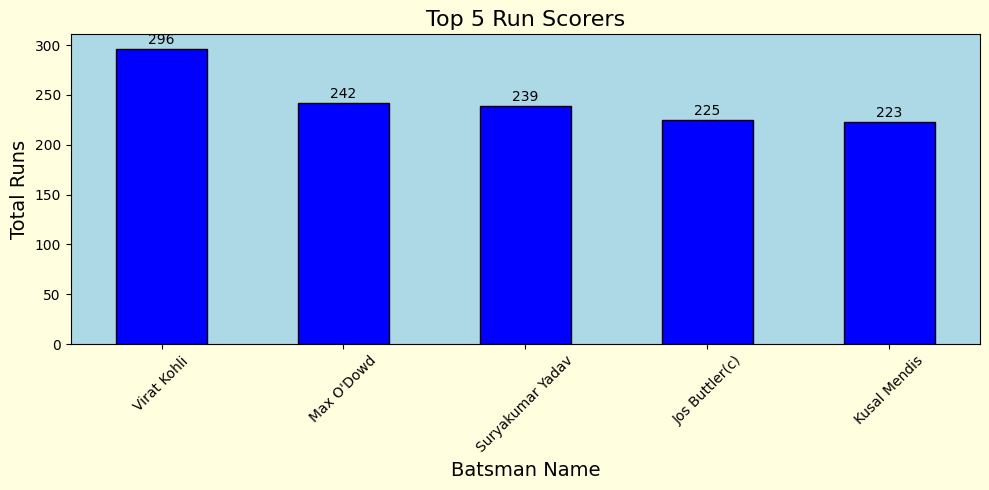

In [44]:
plt.figure(figsize=(10, 5), facecolor='lightyellow')

ax = plt.gca()
ax.set_facecolor('lightblue')

# Plot the bar chart
bar_plot = top_5_scorers.plot(kind='bar', color='blue', edgecolor='black')

# Add values on top of each bar
for index, value in enumerate(top_5_scorers):
    plt.text(index, value + 5, str(value), ha='center', fontsize=10, color='black')

# Add titles and labels
plt.title('Top 5 Run Scorers', fontsize=16)
plt.xlabel('Batsman Name', fontsize=14)
plt.ylabel('Total Runs', fontsize=14)

# Customize ticks
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Bowling Team

In [45]:
bowling_summary_df_copy = bowling_summary_df.copy()
bowling_summary_df_copy.dtypes

match          object
bowlingTeam    object
bowlerName     object
overs          object
maiden         object
runs           object
wickets        object
economy        object
0s             object
4s             object
6s             object
wides          object
noBalls        object
match_id       object
dtype: object

In [46]:
bowling_summary_df_copy['wickets'] = pd.to_numeric(bowling_summary_df_copy['wickets'], errors='coerce')

In [47]:
print("Number of NaN values in 'wickets':", bowling_summary_df_copy['wickets'].isnull().sum())

Number of NaN values in 'wickets': 0


In [48]:
bowling_summary_df_copy['wickets'] = bowling_summary_df_copy['wickets'].fillna(0).astype(int)

In [49]:
print(bowling_summary_df_copy.dtypes)

match          object
bowlingTeam    object
bowlerName     object
overs          object
maiden         object
runs           object
wickets         int64
economy        object
0s             object
4s             object
6s             object
wides          object
noBalls        object
match_id       object
dtype: object


In [50]:
top_5_wicket_takers = bowling_summary_df_copy.groupby(['bowlerName'])['wickets'].sum().sort_values(ascending=False).head()
top_5_wicket_takers

bowlerName
Wanindu Hasaranga de Silva    15
Bas de Leede                  13
Sam Curran                    13
Blessing Muzarabani           12
Shaheen Shah Afridi           11
Name: wickets, dtype: int64

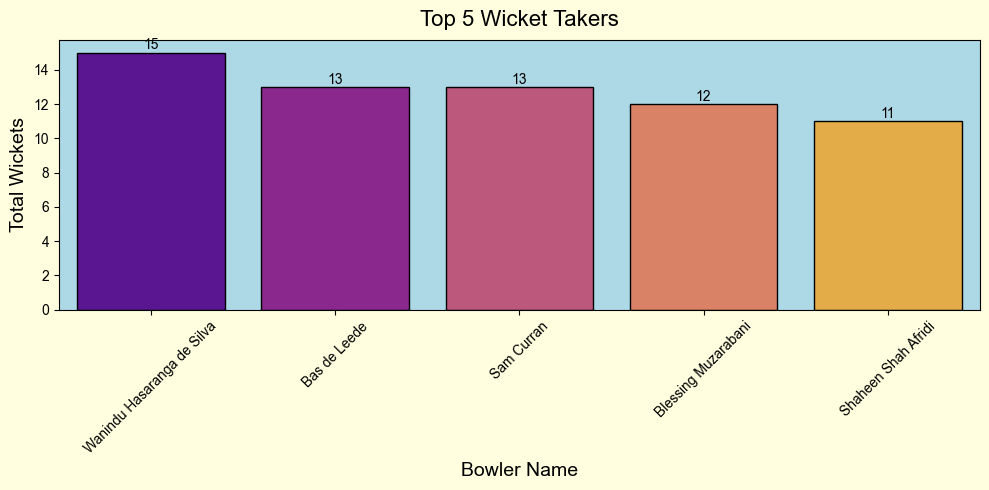

In [51]:
# Assuming `top_5_bowlers` is a Pandas Series
top_5_wicket_takers = top_5_wicket_takers.reset_index()
top_5_wicket_takers.columns = ['Bowler Name', 'Total Wickets']

# Set the figure size and background color
plt.figure(figsize=(10, 5), facecolor='lightyellow')

ax = plt.gca()
ax.set_facecolor('lightblue')
sns.set_style("whitegrid")

# Create the bar plot
sns.barplot(
    data=top_5_wicket_takers,
    x='Bowler Name',
    y='Total Wickets',
    hue='Bowler Name',  # Assign x variable to hue
    palette='plasma',
    edgecolor='black',
    legend=False,  # Disable legend since hue is the same as x
)

# Annotate values on top of the bars
for index, row in top_5_wicket_takers.iterrows():
    plt.text(index, row['Total Wickets'] + 0.2, str(row['Total Wickets']), ha='center', fontsize=10, color='black')

# Add titles and labels
plt.title('Top 5 Wicket Takers', fontsize=16, backgroundcolor='lightyellow', pad=10)
plt.xlabel('Bowler Name', fontsize=14)
plt.ylabel('Total Wickets', fontsize=14)

# Customize ticks
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()